In [2]:
pip install tensorflow

  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached protobuf-3.17.3-cp38-cp38-win_amd64.whl (909 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)

In [3]:
# 미리 학습되어진 신경망 불러오기 

from tensorflow.keras.applications import MobileNetV2

# 함수형 방식의 신경망 구축 

from tensorflow.keras.layers import Input

In [4]:
pip install opencv-python

  Using cached opencv_python-4.5.3.56-cp38-cp38-win_amd64.whl (34.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2
ERROR: No matching distribution found for cv2


In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 #openCV -> pip install opencv-python / pip install cv2
import os 
import csv

from PIL import Image

In [7]:
label_text = pd.read_csv('dog-breed-identification/labels.csv')
print(label_text.head(5))
# print(label_text.info())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [8]:
label_text['breed'].nunique()

120

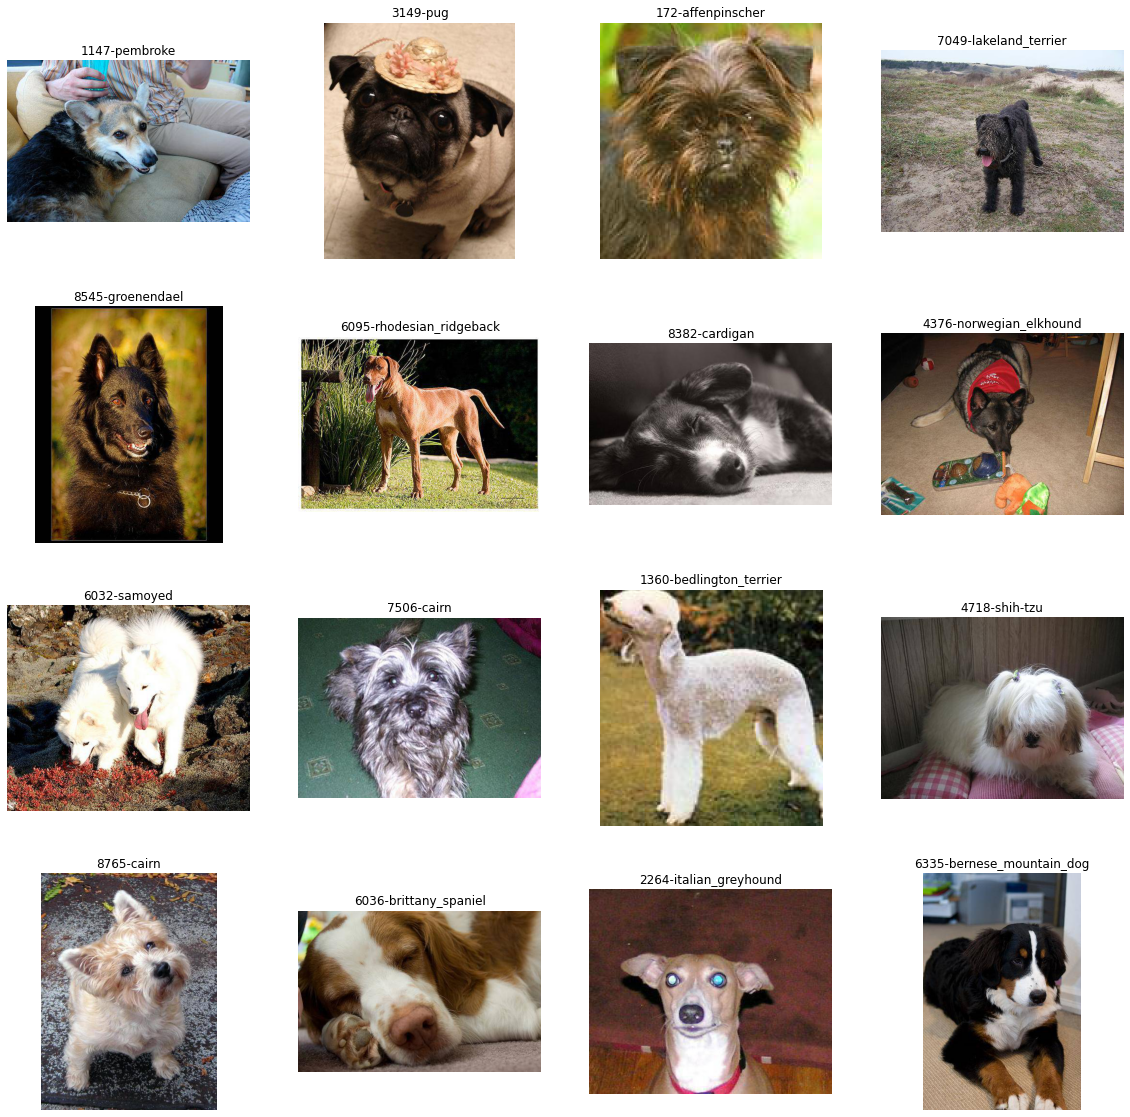

In [9]:
# 사진당 크기 
plt.figure(figsize=(20,20))

# 총 16장의 사진을 출력 
for i in range(16):

    # 가로 4개 세로 4개씩 하여 이미지를 출력합니다.
    plt.subplot(4,4,i+1)

    # 무작위 값을 주어 매번 다른 이미지가 출력되도록 합니다.
    i = np.random.choice(10222)

    #label_text 변수에 loc를 사용하여 
    # [i번 째 행,'id' 라는 열] 의 값을 할당합니다.
    image_id = label_text.loc[i, 'id']

    #절대경로 설정을 활용하여 사진 출력
    # 이미지 
    plt.imshow(plt.imread('dog-breed-identification/train/' + image_id + '.jpg'))

    #사진과 함께 번호(i) + 제목 ( loc[i,'breed'] ) 출력
    plt.title(str(i) + '-' + label_text.loc[i, 'breed'])

    # 축 정보 표기 x
    plt.axis('off')

plt.show()

In [10]:
mobile_v2 = MobileNetV2()

In [11]:
mobile_v2 = MobileNetV2()
mobile_v2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [12]:
for layer in mobile_v2.layers[:-1]:
    layer.trainable = True

In [13]:
for layer in mobile_v2.layers[:-1]:
    if 'kernel' in layer.__dict__:

        # kernel의 shape값을 얻어내는 과정 
        kernel_shape = np.array(layer.get_weights()).shape

        # 파라미터 초기화 과정 
        layer.set_weights(np.random.normal(0,1,kernel_shape))

In [14]:
train_X = []

for i in range(len(label_text)): # 모든 이미지만큼 반복 수행
    #이미지 읽어들이기
    img = cv2.imread('dog-breed-identification/train/' + label_text['id'][i] + '.jpg')
    img = cv2.resize(img, dsize=(224, 224)) # 이미지 크기 통일
    
    img = img / 255.0 # 이미지 크기 최소-최대 정규화
    #(이미지 크기 축소)
    
    train_X.append(img) # 빈 리스트에 학습 데이터 생성

train_X = np.array(train_X) # 학습 데이터를 array 타입으로 전환 

# 얻어진 학습 데이터의 shape 확인 
print(train_X.shape)

(10222, 224, 224, 3)


In [15]:
unique_Y = label_text['breed'].unique().tolist()
print(unique_Y)

unique_Y.index('dingo')

['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever', 'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound', 'shetland_sheepdog', 'walker_hound', 'maltese_dog', 'norfolk_terrier', 'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer', 'doberman', 'otterhound', 'standard_schnauzer', 'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn', 'affenpinscher', 'labrador_retriever', 'ibizan_hound', 'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael', 'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier', 'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz', 'german_shepherd', 'greater_swiss_mountain_dog', 'basset', 'australian_terrier', 'schipperke', 'rhodesian_ridgeback', 'irish_setter', 'appenzeller', 'bloodhound', 'samoyed', 'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon', 'border_collie', 'entlebucher', 'collie', 'malamute', 'welsh_springer_spaniel', 'chihuahua', 'saluki', 'pug', 'malino

1

In [17]:
train_y = [unique_Y.index(breed) for breed in label_text['breed']]

train_y = np.array(train_y)

print(train_y)

[ 0  1  2 ... 63 77 92]


In [18]:
# 마지막 계층의 이전계층을 변수화 한 과정
output_layer_2 = mobile_v2.layers[-2].output

# 출력 계층 정의
predictions = tf.keras.layers.Dense(units=120, activation='softmax')(output_layer_2)

# 함수형 방식으로 신경망 구축 
model = tf.keras.Model(inputs = mobile_v2.input, outputs = predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_X, train_Y, 
                    epochs = 10,
                    batch_size =32,
                    validation_split = 0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=5),
                                 tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq = 1)])

In [29]:
from tensorflow.keras.applications import MobileNetV2
import tensorflow as tf

mobilev2        = MobileNetV2()
output_layer_2  = mobilev2.layers[-2].output
predictions     = tf.keras.layers.Dense(120, activation='softmax')(output_layer_2)

model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)
#model.summary

In [30]:
for layer in model.layers[:-20]:
    layer.trainable = False

for layer in model.layers[-20:]:
    layer.trainable = True

In [31]:
model.compile(optimizer='sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [34]:
log_dir="dog-breed-identification\log"

In [35]:
history = model.fit(train_X, train_y, 
                    epochs = 10,
                    batch_size =32,
                    validation_split = 0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=5),
                                 tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq = 1)])

C:\Users\xxoel\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/10
240/240 [==============================] - 133s 549ms/step - loss: 3.2575 - accuracy: 0.2806 - val_loss: 1.9847 - val_accuracy: 0.4609
Epoch 2/10
240/240 [==============================] - 143s 595ms/step - loss: 1.6220 - accuracy: 0.6034 - val_loss: 1.6055 - val_accuracy: 0.5446
Epoch 3/10
240/240 [==============================] - 149s 623ms/step - loss: 1.1831 - accuracy: 0.7104 - val_loss: 1.4358 - val_accuracy: 0.5935
Epoch 4/10
240/240 [==============================] - 141s 587ms/step - loss: 0.9364 - accuracy: 0.7758 - val_loss: 1.3733 - val_accuracy: 0.6115
Epoch 5/10
240/240 [==============================] - 146s 607ms/step - loss: 0.7721 - accuracy: 0.8229 - val_loss: 1.3132 - val_accuracy: 0.6217
Epoch 6/10
240/240 [==============================] - 146s 608ms/step - loss: 0.6284 - accuracy: 0.8699 - val_loss: 1.3041 - val_accuracy: 0.6260
Epoch 7/10
240/240 [==============================] - 142s 592ms/step - loss: 0.5262 - accuracy: 0.9057 - val_loss: 1.2699 -

In [24]:
model =  tf.keras.models.load_model("ImageNet_dogs.h5")

In [25]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

Predict Prob : 
 [[ 1.1  0.2  1.3  0.4  0.9  0.3  0.1  0.2  0.   0.3  0.   0.7  0.3  0.7
   0.7  0.8  0.6  1.1  0.2  0.1  0.4  0.2  0.5  0.2  0.6  4.   0.3  0.6
   0.4  0.8  0.2  0.2  0.5  0.3  0.3  0.6  1.1  1.1  0.2  0.6  0.6  0.8
   0.2  1.9  0.7  0.5  0.5 13.2  1.3  0.7  0.2  0.4  0.2  1.6  0.2  0.4
   0.6  0.4  4.4  0.7  0.3  0.3  1.1  0.2  0.1  0.6  0.6  0.6  0.4  0.2
   0.7  0.4  0.4  0.6  0.4  0.6  0.1  0.3  0.3  0.2  0.3  0.5  0.5  0.7
   0.3  0.6  6.1  0.4  0.6  1.6  3.6  0.3  0.2  1.   1.4  4.1  0.3  1.3
   1.2  0.2  0.3  0.3  1.5  0.4  0.4  1.4  0.4  1.8  0.6  0.4  0.4  0.3
   0.1  0.2  0.5  1.   1.2  0.2  2.1  0.4]]
Model Predict : Index-47


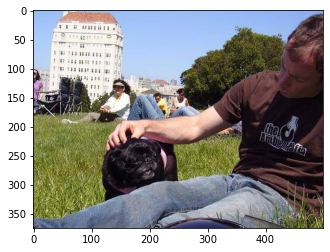

In [27]:
img = plt.imread('dog-breed-identification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg')
img = np.resize(img,(224,224,3))
img = img / 255.0
img = np.expand_dims(img, axis=0)

prob = model.predict(img)

print("Predict Prob : \n",np.round(prob * 100,1))
plt.imshow(plt.imread('dataset/dogs/test/test/001510bc8570bbeee98c8d80c8a95ec1.jpg'))
print("Model Predict : Index-{}".format(np.argmax(prob)))